In [1]:
import pandas as pd
from pandas import DataFrame,Series
%matplotlib inline

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df.head()

,Unnamed: 0,neg_sent,neu_sent,pos_sent,Topic0,Topic1,Topic2,Topic3,y_3,y_7,y_30,y_90
0,0,0.017,0.799,0.184,0.88,0.08,0.02,0.02,False,False,False,False
1,1,0.021,0.849,0.130,0.89,0.08,0.02,0.02,True,True,True,True
2,2,0.026,0.826,0.148,0.89,0.07,0.02,0.02,True,True,False,False
3,3,0.012,0.876,0.112,0.02,0.01,0.96,0.01,False,False,False,False
4,4,0.024,0.813,0.162,0.01,0.01,0.96,0.01,True,False,False,False


In [3]:
df.drop(columns=['Unnamed: 0', 'neu_sent'], inplace=True)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
rf_results = DataFrame(index = [3,7,30,90])

In [34]:
topics = []
for i in [3,7,30,90]:
    X = df.drop(columns=['y_3', 'y_7', 'y_30', 'y_90'])
    y = df['y_' + str(i)]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    param_grid = {'n_estimators' : [10, 20, 50, 100],
            'min_samples_leaf' : [3, 5, 10],
            'max_features' : [2,4,6]}

    model = RandomForestClassifier()
    grid_search = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=5)
    grid_search.fit(X_train,y_train)

    topics.append(grid_search.best_score_)

rf_results['topics'] = topics

In [35]:
rf_results

,topics,xg
3,0.520276,0.541885
7,0.514093,0.527723
30,0.541167,0.553130
90,0.526756,0.531954


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

       False       0.54      0.72      0.62       242
        True       0.53      0.34      0.41       226

    accuracy                           0.54       468
   macro avg       0.53      0.53      0.51       468
weighted avg       0.54      0.54      0.52       468



In [37]:
#pip install xgboost

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
xg = []
for i in [3,7,30,90]:
    X = df.drop(columns=['y_3', 'y_7', 'y_30', 'y_90'])
    y = df['y_' + str(i)]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    param_grid = {'n_estimators' : [10, 20, 50, 100],
            'learning_rate' : [0.1, 0.01, 0.001],
            'max_depth' : [2,4,6]}

    model = GradientBoostingClassifier()
    grid_search = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=5)
    grid_search.fit(X_train,y_train)

    xg.append(grid_search.best_score_)
    print(classification_report(y_test, grid_search.predict(X_test)))

rf_results['xg'] = xg

              precision    recall  f1-score   support

       False       0.51      0.98      0.67       234
        True       0.72      0.06      0.10       234

    accuracy                           0.52       468
   macro avg       0.62      0.52      0.39       468
weighted avg       0.62      0.52      0.39       468

              precision    recall  f1-score   support

       False       0.53      0.69      0.60       247
        True       0.48      0.32      0.38       221

    accuracy                           0.51       468
   macro avg       0.50      0.50      0.49       468
weighted avg       0.50      0.51      0.50       468

              precision    recall  f1-score   support

       False       0.53      0.75      0.62       239
        True       0.55      0.31      0.40       229

    accuracy                           0.54       468
   macro avg       0.54      0.53      0.51       468
weighted avg       0.54      0.54      0.51       468

              preci

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

       False       0.53      0.62      0.57       242
        True       0.50      0.41      0.45       226

    accuracy                           0.52       468
   macro avg       0.51      0.51      0.51       468
weighted avg       0.51      0.52      0.51       468



In [68]:
xg

[0.540049959784473, 0.5289822232744442, 0.5531129064214513, 0.5300041798771254]

In [42]:
X = df.drop(columns=['y_3', 'y_7', 'y_30', 'y_90'])
y = df['y_30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

param_grid = {'n_estimators' : [10, 20, 50, 100],
        'learning_rate' : [0.1, 0.01, 0.001],
        'max_depth' : [2,4,6]}

model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [43]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20}

In [44]:
model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 2, n_estimators= 20)

In [45]:
model.fit(X,y)
importances = model.feature_importances_

In [46]:
X.columns

Index(['neg_sent', 'pos_sent', 'Topic0', 'Topic1', 'Topic2', 'Topic3'], dtype='object')

In [47]:
s = Series(importances, index=['Negative Sentiment', 'Positive Sentiment', 'Customers', '3rd Party', 'Product', 'Finance'])

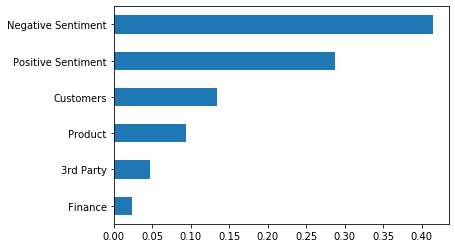

In [48]:
s.sort_values(ascending=True).plot(kind='barh')

In [49]:
X.max()

neg_sent    0.049
pos_sent    0.225
Topic0      0.970
Topic1      0.210
Topic2      0.970
Topic3      0.490
dtype: float64

In [50]:
import random

In [51]:
random.randint(0,100)

20

In [52]:
r = DataFrame(index=['1','2','3','4','5','6'])

In [53]:
for i in range(1560):
    rand = []
    for j in range(6):
        rand.append(random.randint(0,1000)/1000)
    r[i] = rand

In [54]:
r.T

,1,2,3,4,5,6
0,0.636,0.848,0.943,0.612,0.388,0.027
1,0.602,0.093,0.274,0.139,0.033,0.733
2,0.151,0.227,0.086,0.847,0.005,0.358
3,0.395,0.508,0.901,0.880,0.388,0.463
4,0.538,0.376,0.373,0.099,0.099,0.912
...,...,...,...,...,...,...
1555,0.401,0.229,0.211,0.281,0.384,0.908
1556,0.497,0.977,0.158,0.115,0.847,0.271
1557,0.940,0.152,0.149,0.206,0.513,0.108
1558,0.210,0.065,0.287,0.072,0.481,0.090


In [55]:
df['y_30']

0       False
1        True
2       False
3       False
4       False
        ...  
1555    False
1556     True
1557     True
1558    False
1559     True
Name: y_30, Length: 1560, dtype: bool

In [56]:
X = r.T
y = df['y_30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

param_grid = {'n_estimators' : [10, 20, 50, 100],
        'learning_rate' : [0.1, 0.01, 0.001],
        'max_depth' : [2,4,6]}

model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [57]:
grid_search.best_score_

0.5418943785673905

In [58]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [59]:
model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, n_estimators= 100)

In [60]:
model.fit(X,y)
importances = model.feature_importances_

In [61]:
importances

array([0.15995347, 0.1813417 , 0.17185391, 0.17254841, 0.142147  ,
       0.1721555 ])